# Programming: Convolution Neural Network

## 2.1 Play with CNN
### 2.1.1 Construct CNN model
### Let's programming for constructing simple CNN

In [1]:
import torch
import torch.nn as nn

In [70]:
class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        self.net = nn.Sequential(*[
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),   
        ])
    def forward(self, input):
        x = self.net(input)
        return x

In [71]:
# View model through print function
model = CNN1()
if torch.cuda.is_available():
    model = model.cuda()
else:
    model = model.cpu()
print(model)

CNN1(
  (net): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)


### 2.1.2 Extract feature maps
### Let's see what does CNN output through input image
Please download the file "dog.jpg" and put to the directory where you activate the jupyterbook for programming. 

In [72]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
# Load image and show
img = Image.open('./dog.jpg').convert('RGB')
img.show()

In [73]:
# Convert image for network
import torchvision.transforms as transforms

t = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])
# Transform img(PIL) -> img(Tensor)
tensor_img = t(img)
tensor_img = tensor_img.unsqueeze_(0) # Reshape [3, 256, 256] -> [1, 3, 256, 256]
print(tensor_img.size())
# Append to gpu (or cpu)
if torch.cuda.is_available():
    tensor_img = tensor_img.cuda()
else:
    tensor_img = tensor_img.cpu()
print(tensor_img.device)

torch.Size([1, 3, 256, 256])
cuda:0


In [74]:
# Output 128 ch feature maps from CNN1
output = model(tensor_img)
print(output.size())

torch.Size([1, 64, 128, 128])


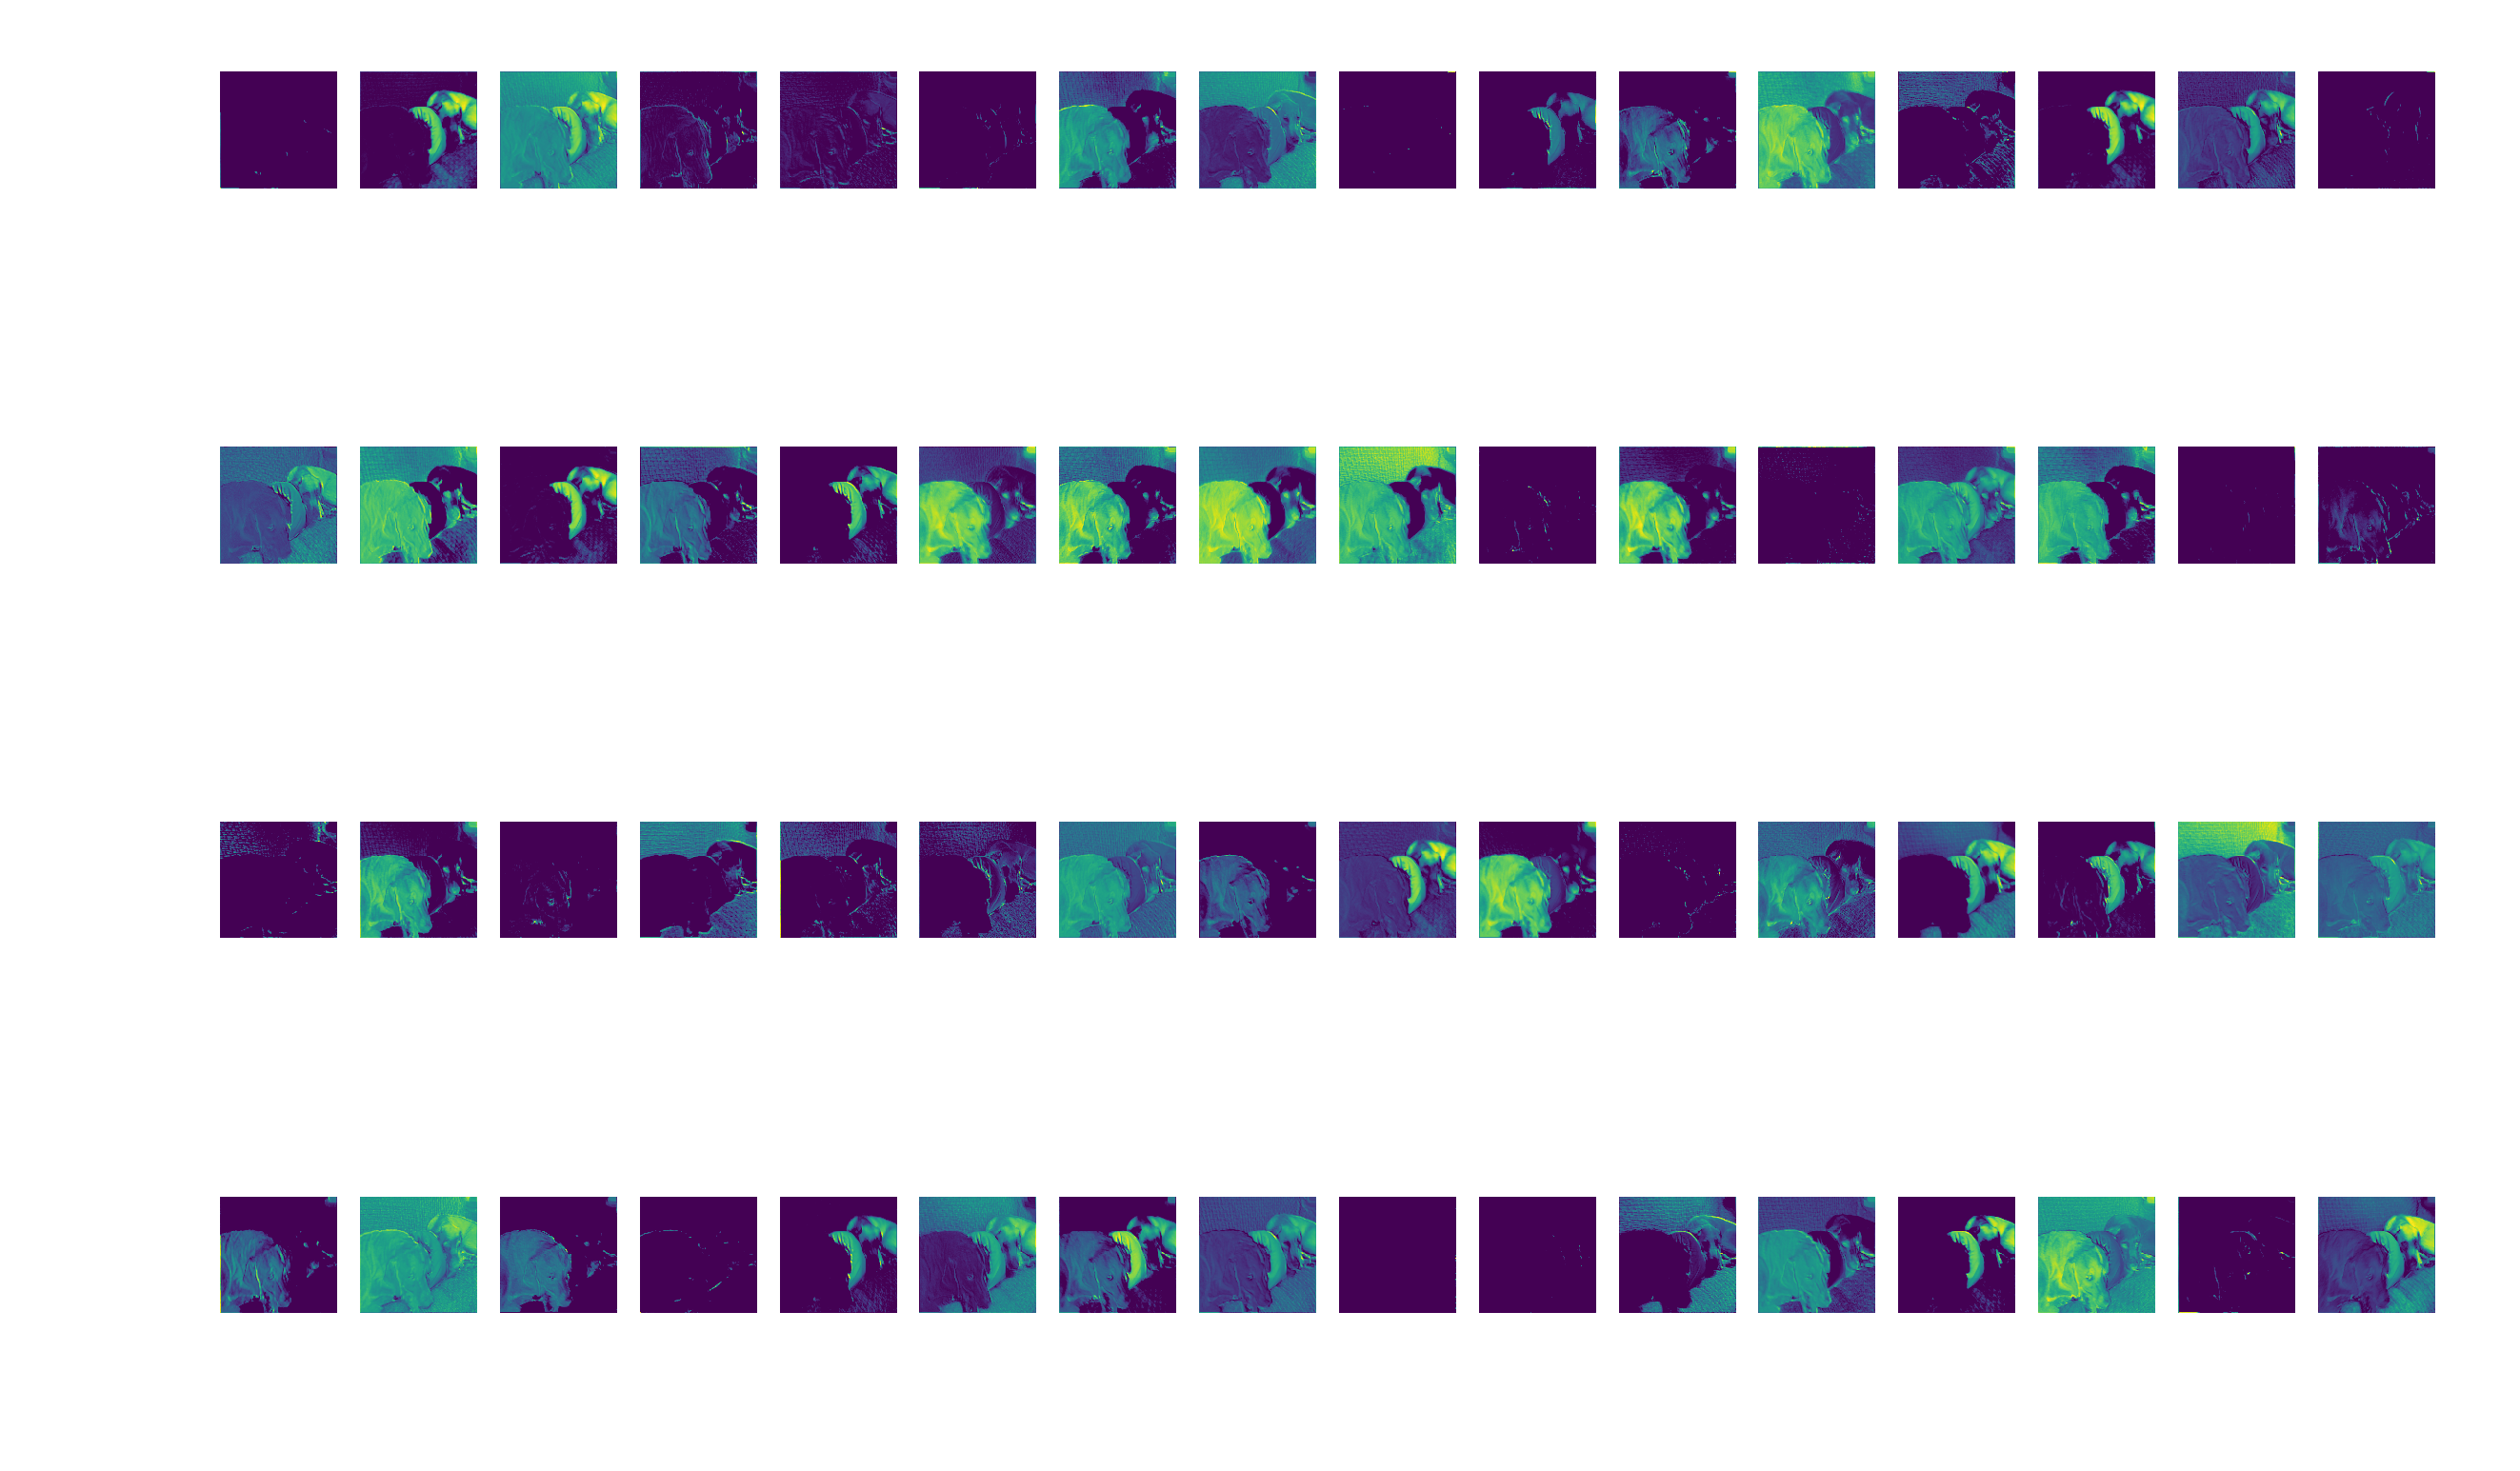

In [75]:
# View output through plt
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4),dpi=500)
for i in range(64):
    o = output[0][i].data.cpu().numpy()
    plt.subplot(4, 16, i+1)
    plt.imshow(o)
    plt.axis('off')
plt.show()

### 2.1.3 Extract feature maps using pre-trained model

In [53]:
import torchvision.models as models

model = models.vgg16(pretrained=True)
if torch.cuda.is_available():
    model = model.cuda()
else:
    model = model.cpu()
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [55]:
# Extract feature maps until (features)
output = model.features(tensor_img)
print(output.size())

torch.Size([1, 512, 8, 8])


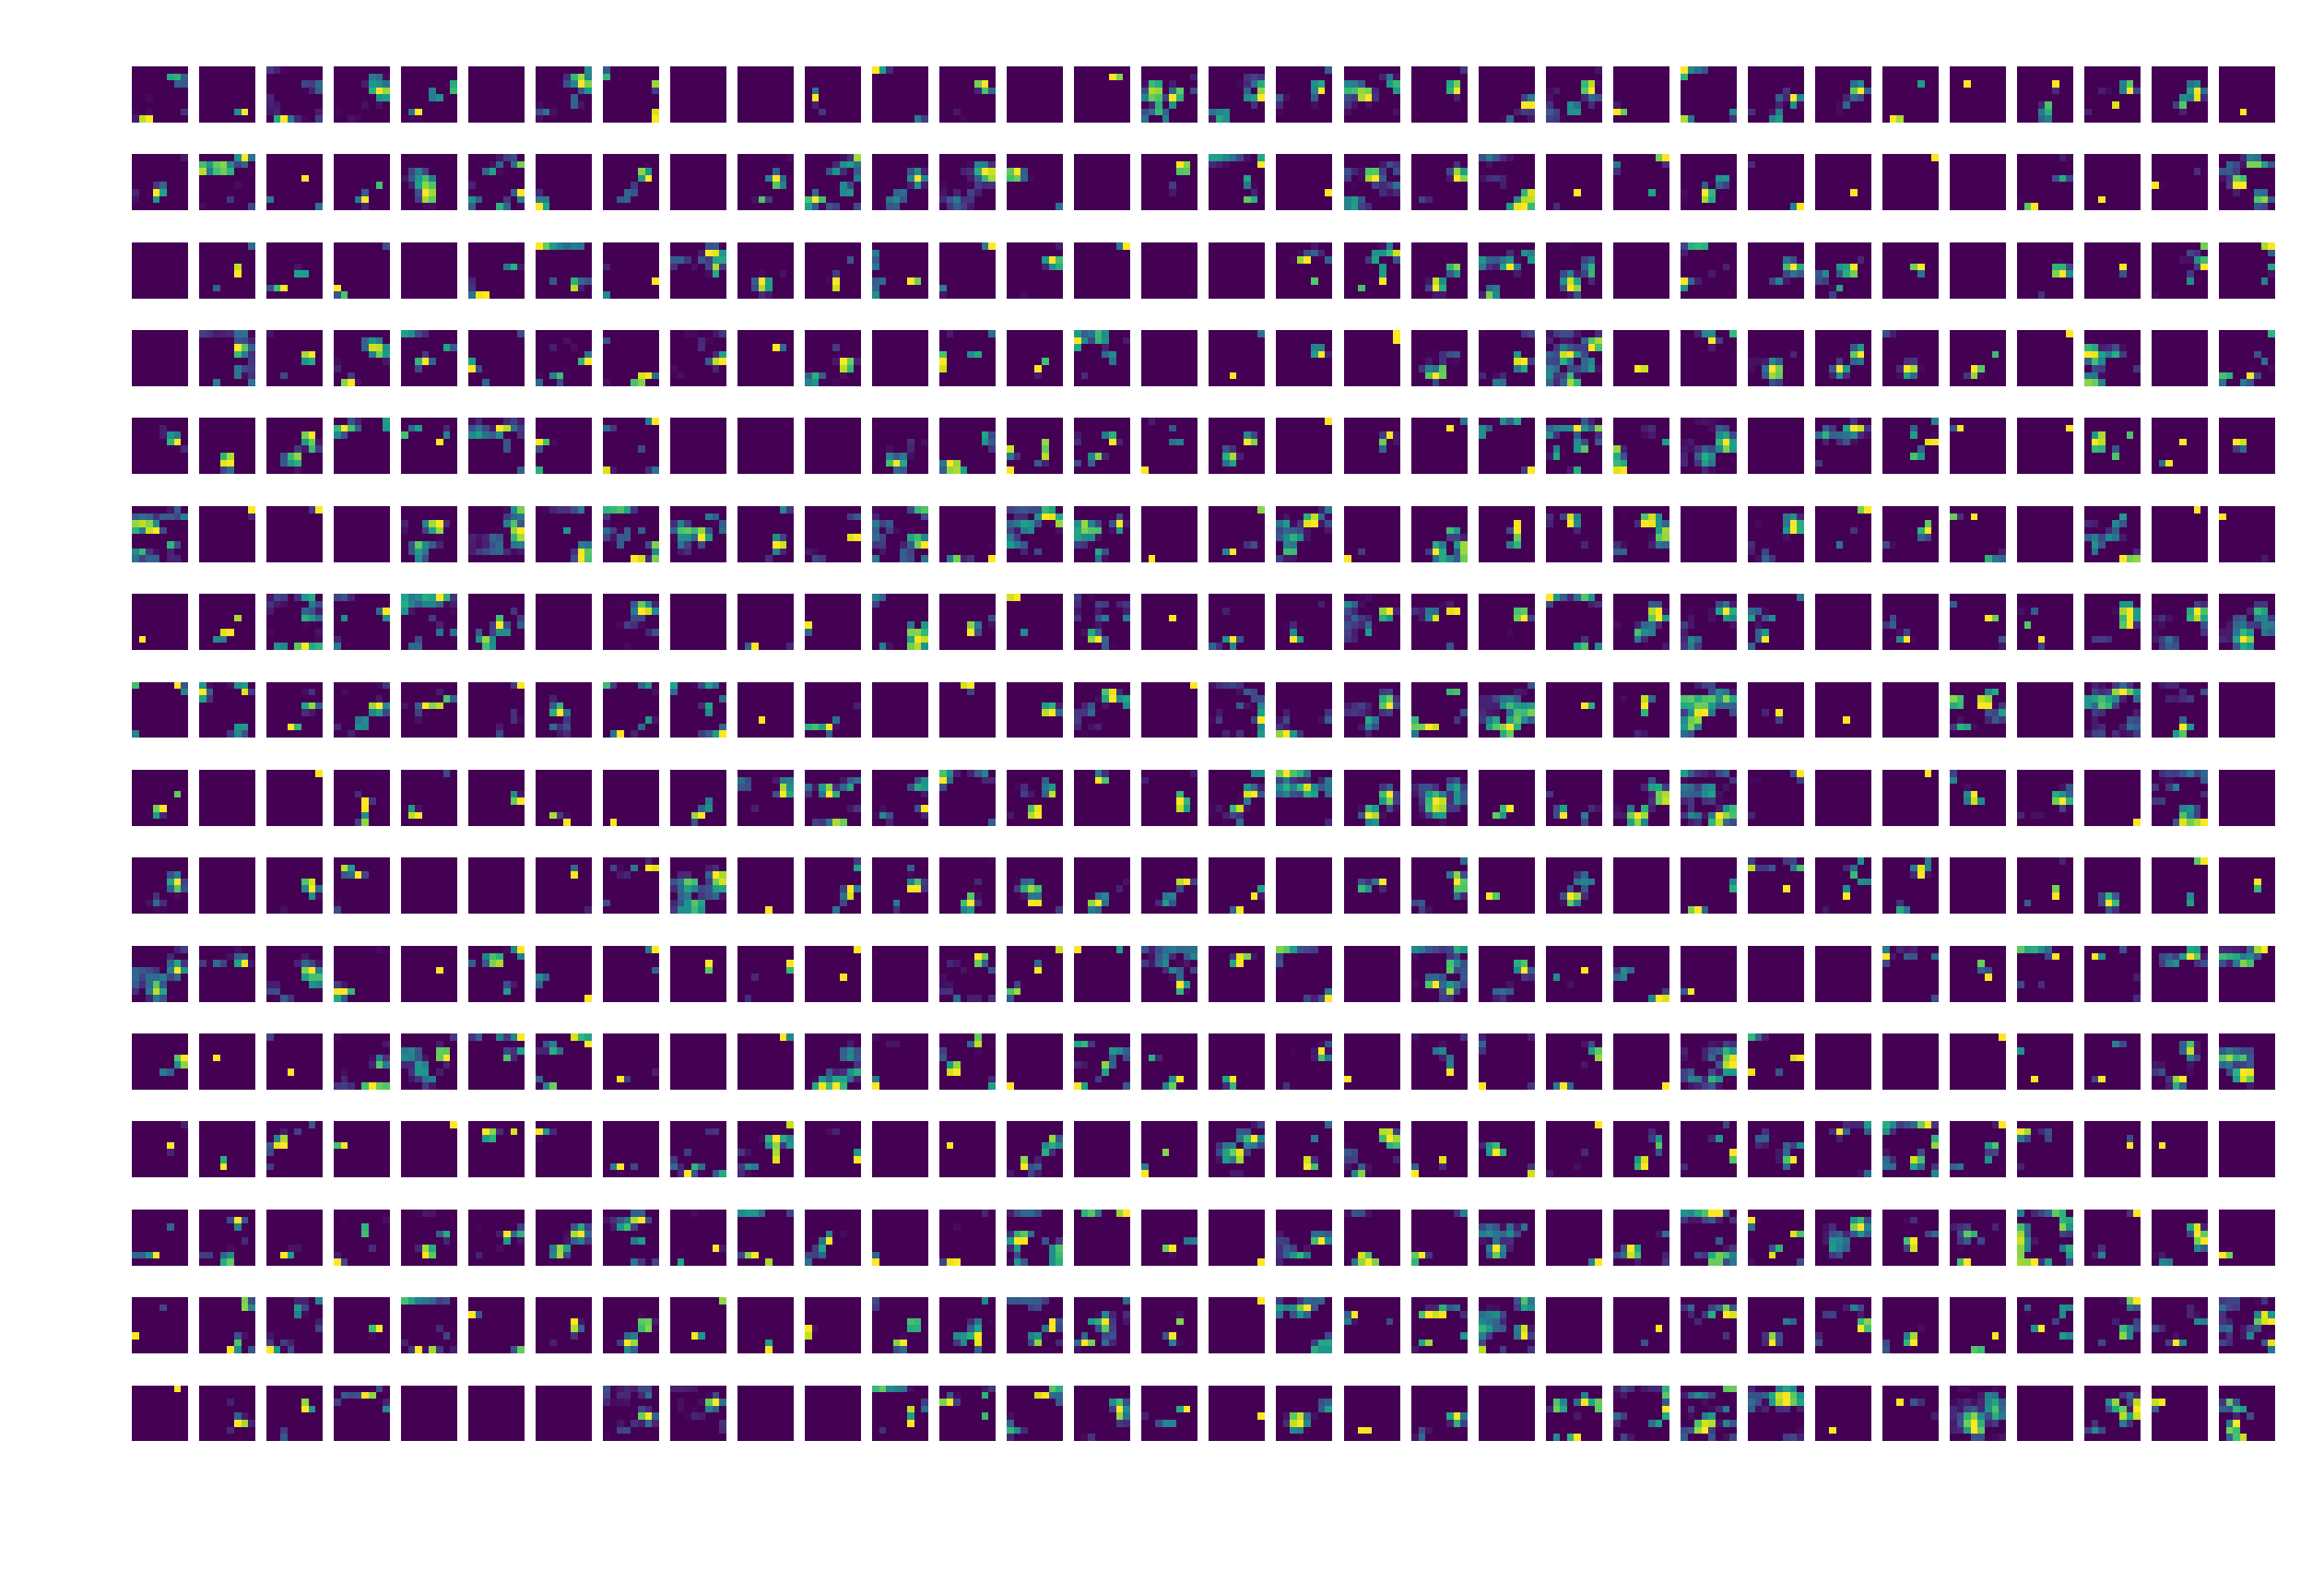

In [48]:
# View output through plt
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4),dpi=500)
for i in range(512):
    o = output[0][i].data.cpu().numpy()
    plt.subplot(16, 32, i+1)
    plt.imshow(o)
    plt.axis('off')
plt.show()

In [67]:
# Extract feature maps until feature(15)
module_list = list(model.features.modules())[1:5]
#print(module_list)
output = tensor_img
for layer in module_list:
    output = layer(output)
print(output.size())

torch.Size([1, 64, 256, 256])


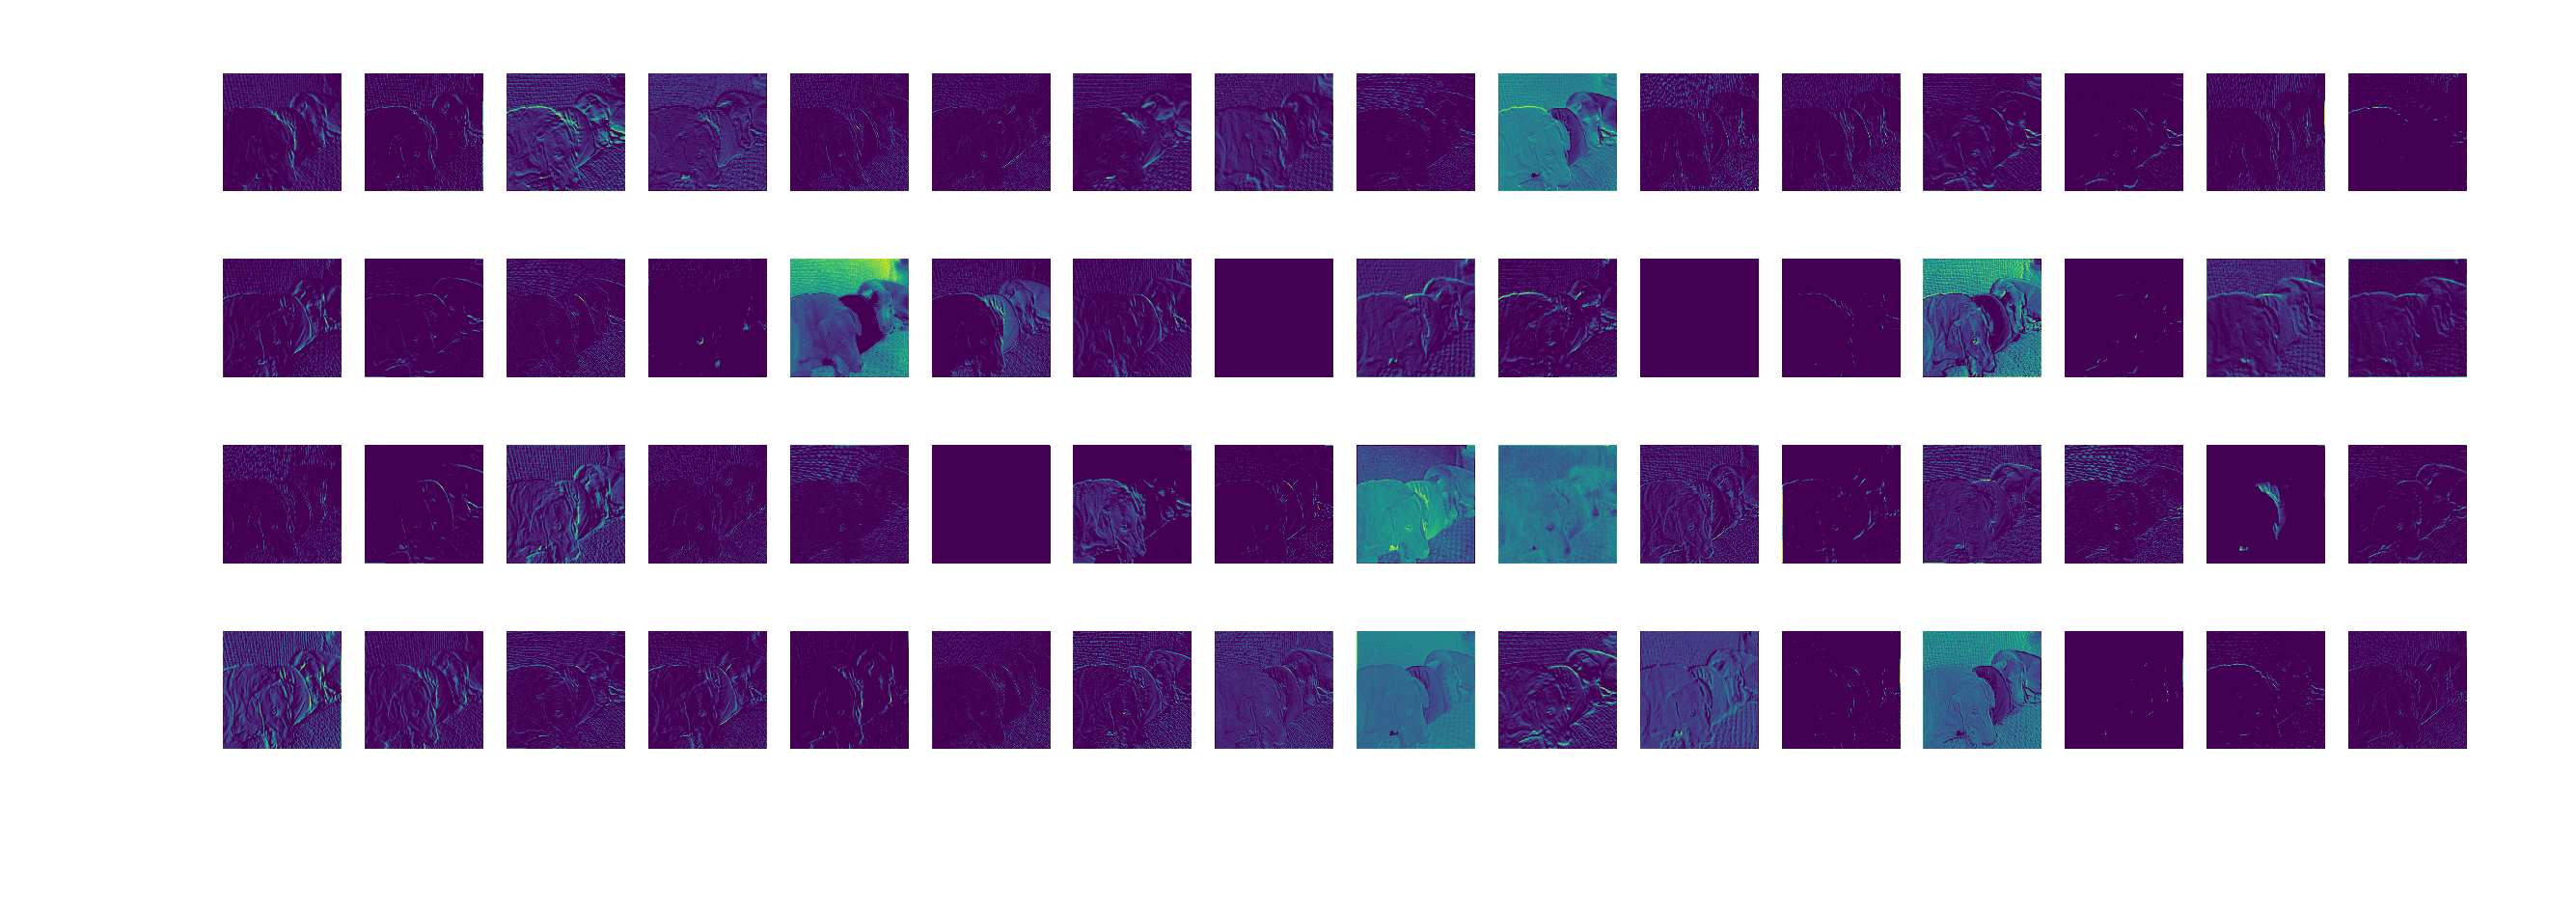

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [69]:
plt.figure(figsize=(6,4),dpi=500)
for i in range(64):
    o = output[0][i].data.cpu().numpy()
    plt.subplot(4, 16, i+1)
    plt.imshow(o)
    plt.axis('off')
plt.show()

## 2.2 Invesitigate network using "torchsummary"
### To be able to view the content of model and the number of parameters, let's install the python liblary named "torchsummary"
Step1. Open "Command Prompt"<br>
Step2. Command "pip install torchsummary"<br>
Step3. Finish

### 2.2.1 Compare number of parameters

In [52]:
# View model through torchsummary
from torchsummary import summary
summary(model, (3, 256, 256)) #第一引数にはモデル、第二引数にインプットデータのサイズ(Ch, H, W)を入力

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 127, 127]           4,864
              ReLU-2         [-1, 64, 127, 127]               0
       BatchNorm2d-3         [-1, 64, 127, 127]             128
            Conv2d-4          [-1, 128, 63, 63]         204,928
            Conv2d-5          [-1, 128, 32, 32]         147,584
Total params: 357,504
Trainable params: 357,504
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.75
Forward/backward pass size (MB): 28.50
Params size (MB): 1.36
Estimated Total Size (MB): 30.62
----------------------------------------------------------------


### Let's programming for constructing simple FCN

In [53]:
class FCN1(nn.Module):
    def __init__(self):
        super(FCN1, self).__init__()
        self.net = nn.Sequential(*[
            nn.Linear(3*256*256, 64),
            nn.ReLU(True),
            nn.BatchNorm1d(1), #ch=1なので1
            nn.Linear(64, 128),
            nn.Linear(128, 128)     
        ])
    def forward(self, input):
        x = self.net(input)
        return x

In [54]:
model = FCN1()
if torch.cuda.is_available():
    model.cuda()
else:
    model.cpu()
summary(model, (1, 3*256*256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]      12,582,976
              ReLU-2                [-1, 1, 64]               0
       BatchNorm1d-3                [-1, 1, 64]               2
            Linear-4               [-1, 1, 128]           8,320
            Linear-5               [-1, 1, 128]          16,512
Total params: 12,607,810
Trainable params: 12,607,810
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.75
Forward/backward pass size (MB): 0.00
Params size (MB): 48.09
Estimated Total Size (MB): 48.85
----------------------------------------------------------------


## 2.2.2 Freeze the part of parameter at Model

In [55]:
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Sequential(*[
            nn.Conv2d(3, 64, 5, 2, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        ])
        self.conv2 = nn.Sequential(*[
            nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=1),
            nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1)
        ])
    def forward(self, input):
        x = self.conv1(input)
        x = self.conv2(x)
        return x

In [57]:
# Define CNN2
model = CNN2()
if torch.cuda.is_available():
    model.cuda()
else:
    model.cpu()
# Freeze self.conv2
for name, p in model.named_parameters():
    if 'conv2' in name:
        p.requires_grad=False

In [58]:
summary(model, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 127, 127]           4,864
       BatchNorm2d-2         [-1, 64, 127, 127]             128
              ReLU-3         [-1, 64, 127, 127]               0
            Conv2d-4          [-1, 128, 63, 63]         204,928
            Conv2d-5          [-1, 128, 32, 32]         147,584
Total params: 357,504
Trainable params: 4,992
Non-trainable params: 352,512
----------------------------------------------------------------
Input size (MB): 0.75
Forward/backward pass size (MB): 28.50
Params size (MB): 1.36
Estimated Total Size (MB): 30.62
----------------------------------------------------------------


# Homeworks (Programming)
## 2.1 Construct model which consists of CNN, BatchNorm2d and Maxpooling layers and view the parameters through torchsummary
## 2.2 Load pretrained model "resnet18" through python library torchvision.models and view the paramters through torchsummary
Tips: resnet18 adopts the input img (3, 244, 244)

In [62]:
# Hint for load resnet18
import torchvision.models as models
model = models.resnet18()

## 2.3  Search another pretrained models through torchvision.models and freeze the part of parameter where you want
Tips: torchsummaryでは定義されたレイヤーの種類を見ることができても、名付けたモジュール名が見えないのに注意！